**Business Objective**

Rampant fraud in US healthcare system results in increased premiums for many vulnerable citizens who cannot afford to pay hefty price for a fundamental right such as healthcare. The aim is to find patterns of fraud commited by providers and train ML models to detect similar patterns in the future. Dataset for this capstone project is obtained from Kaggle [here](https://www.kaggle.com/code/rohitrox/medical-provider-fraud-detection/data).

---


Abuse in healthcare system can take many forms, such as:

*Billing for services that were not rendered.

*Duplicate submission of a claim for the same service.

*Charging for a more complex or expensive than was actually provided.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

#--- google drive refs
m_kstrRoot = '/content/drive/My Drive/Colab Notebooks/fourthbrain.ai/'
m_kstrRoot = m_kstrRoot + 'capstone/'
m_kstrData = m_kstrRoot + 'data/'

Mounted at /content/drive


# pre-reqs

In [1]:
#--- imports;  versions reqs listed are from local fastapi dev env:  prod_capstone  
import pandas as pd               #--- pandas==1.5.2
import numpy as np                #--- numpy==1.23.5             
import sklearn                    #--- scikit-learn >=1.2.0            
import pickle                     #--- pickle >= 4.0
            

def persistScaler(scalarObj):
  #--- persist the std scaler
  with open(m_kstrData + "std_scaler_colab.pkl", 'wb') as filPkl:
      pickle.dump(scalarObj, filPkl)

def persistLogRegr_model(modelObj):
  with open(m_kstrData + "lgr_model_colab.pkl", 'wb') as filPkl:
      pickle.dump(modelObj, filPkl)

def persistSVM_model(modelObj):
  with open(m_kstrData + "svm_model_colab.pkl", 'wb') as filPkl:
      pickle.dump(modelObj, filPkl)

def persistGBC_model(modelObj):
  with open(m_kstrData + "gbc_model_colab.pkl", 'wb') as filPkl:
      pickle.dump(modelObj, filPkl)


def persistEnc_model(modelObj):
  with open(m_kstrData + "enc_model_colab.pkl", 'wb') as filPkl:
      pickle.dump(modelObj, filPkl)


def persistKMeans_model(modelObj):
  with open(m_kstrData + "kmn_model_colab.pkl", 'wb') as filPkl:
      pickle.dump(modelObj, filPkl)


def prereq_createCondaEnv():

  try:
    print("INFO:  activating conda env_capstone ...")
    !conda activate env_capstone
  except CommandNotFoundError:
    #--- possibly, conda is not initialized?
    print("EXCEPTION: ... CommandNotFoundError")
    !conda init bash
    !conda create --name env_capstone python=3.10.8
  except excE:
    print("EXCEPTION: ... ", excE)
  finally:
    !conda activate env_capstone
    
'''    
  try:
    print("INFO:  creating new conda env_capstone ...")
    !conda create --name env_capstone python=3.10.8
  except:
    #--- possibly the env already exists?

 
    !conda create --name env_capstone python=3.10.8
'''


def prereq_getCurrVersions():
  print("INFO:  get current dep versions ...")
  print("python.v: ")                               #--- python 3.10.8
  !python -V

  print("pd.v: ", pd.__version__)                   #--- pandas 1.5.2
  print("np.v: ", np.__version__)                   #--- numpy 1.24.1
  print("sk.v: ", sklearn.__version__)              #--- sklearn >=0.0.post1
  #print("skl.v: ", scikit-learn.__version__)        #--- scikit-learn ==1.2.0
  print("pkl.v: ", pickle.format_version)           #--- pickle >= 4.0

  prereqs_checkSklearn()


def prereq_upgradePython():
  print("INFO:  upgrading python ...")
  !wget https://github.com/korakot/kora/releases/download/v0.10/py310.sh
  !bash ./py310.sh -b -f -p /usr/local
  !python -m ipykernel install --name "py310" --user


def prereq_upgradeDeps():
  #--- optional exec:  ensure minimum libraries and versions
  print("INFO:  upgrading dependencies ...")
  !pip3 install -U pandas>=1.5.3
  !pip3 install -U numpy>=1.24.1

  #!pip3 uninstall scikit-learn -y
  #!pip3 install -U scikit-learn==1.2.0
  #!pip3 install -U sklearn==0.0.post1
  !pip3 install -U sklearn==1.2.0
  
  #!pip install -U pickle>=4.0
  #--- optional exec:  determine default colab libraries and versions


def prereq_forceDeps():
  import pkg_resources
  pkg_resources.require("pandas==1.5.3")
  pkg_resources.require("numpy==1.24.1")
  pkg_resources.require("scikit-learn==1.1.1")

  import pandas
  import numpy
  import sklearn  
  #import scikit-learn

def prereqs_checkSklearn():
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  print("INFO (nbk_capstone_unsuperv_clustering)  StdScaler.version: ", scaler.__getstate__()['_sklearn_version'])
  print("INFO (libModel.fitClaims_stdScalar)  sklearn.version: " , sklearn.__version__)


In [2]:

#--- get current versions
prereq_getCurrVersions()

#prereq_forceDeps()


INFO:  get current dep versions ...
python.v: 
Python 3.10.8
pd.v:  1.5.3
np.v:  1.24.1
sk.v:  1.1.1
pkl.v:  4.0
INFO (nbk_capstone_unsuperv_clustering)  StdScaler.version:  1.1.1
INFO (libModel.fitClaims_stdScalar)  sklearn.version:  1.1.1


In [ ]:
#--- upgrade python to 3.10.6
#prereq_upgradePython()

In [ ]:
#--- upgrade libraries
#!pip list outdated
#!pip install --upgrade pandas==1.5.2 numpy==1.23.5
#!pip install --upgrade pandas==1.5.3 numpy==1.24.1
#prereq_upgradeDeps()

In [3]:

#--- get current versions
prereq_getCurrVersions()

INFO:  get current dep versions ...
python.v: 
Python 3.10.8
pd.v:  1.5.3
np.v:  1.24.1
sk.v:  1.2.1
pkl.v:  4.0


# Fetching Train and Test Files

In [ ]:
#!pip install sklearn==0.0.post1

In [ ]:
import sklearn
sklearn.__version__

'1.0.2'

In [4]:
import numpy as np
import pickle

In [6]:
!pwd

/home/kidcoconut/myLurnins/fourthbrain.ai/code/rpo_mle10_capstone/demo/notebooks


In [3]:

from pathlib import Path

#pth_pwd = Path(__file__).resolve().parent
pth_pwd = Path('/home/kidcoconut/myLurnins/fourthbrain.ai/code/rpo_mle10_capstone/demo/notebooks')
pth_appRoot = str(pth_pwd.parent) + "/app"

pth_root = str(pth_appRoot) + "/"
pth_api = pth_root + "api/"
pth_bin = pth_root + "bin/"
pth_binModels = pth_root + "bin/models/"
pth_data = pth_root + "data/"
pth_lib = pth_root + "lib/"
pth_libModels = pth_root + "models/"
pth_model = pth_root + "model/"
pth_qa = pth_root + "qa/"
pth_routes = pth_root + "routes/"
pth_templ = pth_root + "templ/"
pth_uix = pth_root + "uix/"

print("INFO (pth_appRoot):  ", pth_appRoot)

INFO (pth_appRoot):   /home/kidcoconut/myLurnins/fourthbrain.ai/code/rpo_mle10_capstone/demo/app


In [4]:
import pandas as pd
import os
pathname = '/content/drive/MyDrive/fourthbrain'


#--- IM: override
#pathname = m_kstrData
pathname = pth_data

train_df = pd.read_csv(os.path.join(pathname,'Train-1542865627584.csv'))
train_beneficiary_df = pd.read_csv(os.path.join(pathname,'Train_Beneficiarydata-1542865627584.csv'))
train_inpatient_df = pd.read_csv(os.path.join(pathname,'Train_Inpatientdata-1542865627584.csv'))
train_outpatient_df = pd.read_csv(os.path.join(pathname,'Train_Outpatientdata-1542865627584.csv'))

test_df = pd.read_csv(os.path.join(pathname,'Test-1542969243754.csv'))
test_beneficiary_df = pd.read_csv(os.path.join(pathname,'Test_Beneficiarydata-1542969243754.csv'))
test_inpatient_df = pd.read_csv(os.path.join(pathname,'Test_Inpatientdata-1542969243754.csv'))
test_outpatient_df = pd.read_csv(os.path.join(pathname,'Test_Outpatientdata-1542969243754.csv'))

# Data Engineering on Beneficiary Dataset

In [5]:
train_beneficiary_df['ChronicCond_Alzheimer'].value_counts()

2    92530
1    46026
Name: ChronicCond_Alzheimer, dtype: int64

In [6]:
train_beneficiary_df['ChronicCond_Heartfailure'].value_counts()

2    70154
1    68402
Name: ChronicCond_Heartfailure, dtype: int64

In [7]:
train_beneficiary_df['ChronicCond_Cancer'].value_counts()

2    121935
1     16621
Name: ChronicCond_Cancer, dtype: int64

In [8]:
test_beneficiary_df['ChronicCond_Cancer'].value_counts()

2    55176
1     8792
Name: ChronicCond_Cancer, dtype: int64

In [9]:
cols = ['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke'] 

for col in cols:
  train_beneficiary_df.replace({col: 2}, 0, inplace=True)
  test_beneficiary_df.replace({col: 2}, 0, inplace=True)

In [10]:
train_beneficiary_df['ChronicCond_Alzheimer'].value_counts()

0    92530
1    46026
Name: ChronicCond_Alzheimer, dtype: int64

In [11]:
train_beneficiary_df['ChronicCond_Heartfailure'].value_counts()

0    70154
1    68402
Name: ChronicCond_Heartfailure, dtype: int64

In [12]:
train_beneficiary_df['ChronicCond_Cancer'].value_counts()

0    121935
1     16621
Name: ChronicCond_Cancer, dtype: int64

In [13]:
test_beneficiary_df['ChronicCond_Cancer'].value_counts()

0    55176
1     8792
Name: ChronicCond_Cancer, dtype: int64

## Person's Age on Train dataset

In [14]:
train_beneficiary_df['DOB'] = pd.to_datetime(train_beneficiary_df['DOB'], format = '%Y-%m-%d')
train_beneficiary_df['DOD'] = pd.to_datetime(train_beneficiary_df['DOD'], format = '%Y-%m-%d') 
train_beneficiary_df['Age'] = round((train_beneficiary_df['DOD'] - train_beneficiary_df['DOB']).dt.days/365) 

In [15]:
train_beneficiary_df['Age'].isna().sum(), train_beneficiary_df.shape[0]

(137135, 138556)

**Take-away message**

There are 1421 beneficiaries still alive and we need to calculate their age as well. 

In [16]:
train_beneficiary_df['DOD'].max()

Timestamp('2009-12-01 00:00:00')

**Take-away message**
Beneficiary data was last recorded on 2009-12-01, so we can calculate age of people that are still alive based on this date. 

In [17]:
train_beneficiary_df['Age'].fillna(round(((pd.to_datetime('2019-12-01', format='%Y-%m-%d') - train_beneficiary_df['DOB']).dt.days)/365), inplace=True)

In [18]:
train_beneficiary_df.Age.isna().sum()

0

## Person's Age on Test dataset

In [19]:
test_beneficiary_df['DOB'] = pd.to_datetime(test_beneficiary_df['DOB'], format = '%Y-%m-%d')
test_beneficiary_df['DOD'] = pd.to_datetime(test_beneficiary_df['DOD'], format = '%Y-%m-%d') 
test_beneficiary_df['Age'] = round((test_beneficiary_df['DOD'] - test_beneficiary_df['DOB']).dt.days/365)

In [20]:
test_beneficiary_df['Age'].isna().sum(), test_beneficiary_df.shape[0]


(63394, 63968)

In [21]:
63968 - 63394 

574

**Take-away message**

In the test dataset, there are 574 beneficiaries that are still alive. We'll calculate their age based on the last recorded date. 

In [22]:
test_beneficiary_df['DOD'].max()


Timestamp('2009-12-01 00:00:00')

In [23]:
test_beneficiary_df['Age'].fillna(round(((pd.to_datetime('2019-12-01', format='%Y-%m-%d') - test_beneficiary_df['DOB']).dt.days)/365), inplace=True)


In [24]:
test_beneficiary_df.Age.isna().sum()


0

## Add dead flag column

In [25]:
train_beneficiary_df.shape

(138556, 26)

In [26]:
train_beneficiary_df['DOD'].isna().sum(), train_beneficiary_df['DOD'].notna().sum()

(137135, 1421)

In [27]:
train_beneficiary_df.loc[train_beneficiary_df['DOD'].isna(), 'DeadOrNot'] = 0 
train_beneficiary_df.loc[train_beneficiary_df['DOD'].notna(), 'DeadOrNot'] = 1 

In [28]:
train_beneficiary_df['DeadOrNot'].value_counts()

0.0    137135
1.0      1421
Name: DeadOrNot, dtype: int64

In [29]:
test_beneficiary_df.shape

(63968, 26)

In [30]:
test_beneficiary_df['DOD'].isna().sum(), test_beneficiary_df['DOD'].notna().sum()


(63394, 574)

In [31]:
test_beneficiary_df.loc[test_beneficiary_df['DOD'].isna(), 'DeadOrNot'] = 0 
test_beneficiary_df.loc[test_beneficiary_df['DOD'].notna(), 'DeadOrNot'] = 1 

In [32]:
test_beneficiary_df['DeadOrNot'].value_counts()

0.0    63394
1.0      574
Name: DeadOrNot, dtype: int64

# Data Engineering for in-patient dataset

**Calculating Admitted Days**

Creating a new feature 'AdmittedDays' based on AdmissionDt and DischargeDt

In [33]:
train_inpatient_df['AdmissionDt'] = pd.to_datetime(train_inpatient_df['AdmissionDt'], format='%Y-%m-%d')
train_inpatient_df['DischargeDt'] = pd.to_datetime(train_inpatient_df['DischargeDt'], format='%Y-%m-%d')
train_inpatient_df['AdmittedDays'] = round((train_inpatient_df['DischargeDt'] - train_inpatient_df['AdmissionDt']).dt.days + 1) 
                                           
test_inpatient_df['AdmissionDt'] = pd.to_datetime(test_inpatient_df['AdmissionDt'], format='%Y-%m-%d')
test_inpatient_df['DischargeDt'] = pd.to_datetime(test_inpatient_df['DischargeDt'], format='%Y-%m-%d')
test_inpatient_df['AdmittedDays'] = round((test_inpatient_df['DischargeDt'] - test_inpatient_df['AdmissionDt']).dt.days + 1)

In [34]:
train_inpatient_df['AdmittedDays'].isna().sum()

0

In [35]:
test_inpatient_df['AdmittedDays'].isna().sum()

0

# Merging Inpatient and Outpatient dataset

In [36]:
key_columns_to_merge = list(train_outpatient_df.columns)
key_columns_to_merge

['BeneID',
 'ClaimID',
 'ClaimStartDt',
 'ClaimEndDt',
 'Provider',
 'InscClaimAmtReimbursed',
 'AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6',
 'DeductibleAmtPaid',
 'ClmAdmitDiagnosisCode']

In [37]:
train_merged_patient_data = train_inpatient_df.merge(train_outpatient_df, on=key_columns_to_merge, how='outer')
train_merged_patient_data.shape

(558211, 31)

In [38]:
key_columns_to_merge_test = list(test_outpatient_df.columns)
key_columns_to_merge_test

['BeneID',
 'ClaimID',
 'ClaimStartDt',
 'ClaimEndDt',
 'Provider',
 'InscClaimAmtReimbursed',
 'AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6',
 'DeductibleAmtPaid',
 'ClmAdmitDiagnosisCode']

In [39]:
test_merged_patient_data = test_inpatient_df.merge(test_outpatient_df, on=key_columns_to_merge_test, how='outer')
test_merged_patient_data.shape

(135392, 31)

# Merging Beneficiary with All-patient data

In [40]:
trainAllPatientDetailsData = train_merged_patient_data.merge(train_beneficiary_df, on='BeneID', how='inner')
trainAllPatientDetailsData.shape

(558211, 57)

In [41]:
testAllPatientDetailsData = test_merged_patient_data.merge(test_beneficiary_df, on='BeneID', how='inner')
testAllPatientDetailsData.shape

(135392, 57)

# Merging all-patients data with provider data with fraud label

In [42]:
trainAllPatientDetailsProvider = trainAllPatientDetailsData.merge(train_df, on='Provider', how='inner')
trainAllPatientDetailsProvider.shape

(558211, 58)

In [43]:
testAllPatientDetailsProvider = testAllPatientDetailsData.merge(test_df, on='Provider', how='inner')
testAllPatientDetailsProvider.shape

(135392, 57)

In [44]:
test_columns = list(testAllPatientDetailsProvider.columns)

In [45]:
test_columns = list(testAllPatientDetailsProvider.columns)

In [46]:
train_columns = trainAllPatientDetailsProvider.columns

In [47]:
train_columns = trainAllPatientDetailsProvider.columns

In [48]:
[test for test in train_columns if test not in test_columns]

['PotentialFraud']

In [49]:
test_df.head()

,Provider
0,PRV51002
1,PRV51006
2,PRV51009
3,PRV51010
4,PRV51018


# Missing value information in final dataset

In [50]:
trainAllPatientDetailsProvider.isna().sum()*100/len(trainAllPatientDetailsProvider)

BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
Provider                             0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.270149
OperatingPhysician                  79.497538
OtherPhysician                      64.218548
AdmissionDt                         92.749337
ClmAdmitDiagnosisCode               73.863109
DeductibleAmtPaid                    0.161050
DischargeDt                         92.749337
DiagnosisGroupCode                  92.749337
ClmDiagnosisCode_1                   1.872589
ClmDiagnosisCode_2                  35.041588
ClmDiagnosisCode_3                  56.458221
ClmDiagnosisCode_4                  70.524407
ClmDiagnosisCode_5                  79.949517
ClmDiagnosisCode_6                  84.881702
ClmDiagnosisCode_7                  88.144805
ClmDiagnosisCode_8                

In [51]:
testAllPatientDetailsProvider.isna().sum()*100/len(testAllPatientDetailsProvider)

BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
Provider                             0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.256293
OperatingPhysician                  79.915357
OtherPhysician                      64.080596
AdmissionDt                         92.945669
ClmAdmitDiagnosisCode               73.886197
DeductibleAmtPaid                    0.144765
DischargeDt                         92.945669
DiagnosisGroupCode                  92.945669
ClmDiagnosisCode_1                   1.904101
ClmDiagnosisCode_2                  35.293814
ClmDiagnosisCode_3                  56.682817
ClmDiagnosisCode_4                  70.739039
ClmDiagnosisCode_5                  80.207102
ClmDiagnosisCode_6                  85.109903
ClmDiagnosisCode_7                  88.341261
ClmDiagnosisCode_8                

# Feature Engineering

In [52]:
pd.set_option('display.max_columns', None)
trainAllPatientDetailsProvider.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,AdmittedDays,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,77.0,0.0,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,NaN,0.0,NaT,NaN,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1932-05-01,NaT,1,1,0,39,310,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,88.0,0.0,Yes
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,13.0,1913-12-01,NaT,2,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,106.0,0.0,Yes
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,19.0,1922-10-01,NaT,1,1,0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,97.0,0.0,Yes
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,5.0,1930-07-01,NaT,2,1,0,39,280,12,12,0,1,0,0,1,0,1,1,1,1,0,27000,2136,450,160,89.0,0.0,Yes


In [53]:
columns_to_remove = ['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician',
                     'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
                     'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
                     'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
                     'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                     'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
                     'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
                     'ClmAdmitDiagnosisCode', 'AdmissionDt',
                     'DischargeDt', 'DiagnosisGroupCode','DOB', 'DOD',
                     'State', 'County']

train_final = trainAllPatientDetailsProvider.drop(columns=columns_to_remove, axis=1)
train_final.shape

(558211, 27)

In [54]:
train_final.isnull().sum()

Provider                                0
InscClaimAmtReimbursed                  0
DeductibleAmtPaid                     899
AdmittedDays                       517737
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt                0
OPAnnualDeductibleAmt             

In [55]:
test_final = testAllPatientDetailsProvider.drop(columns=columns_to_remove, axis=1)
test_final.shape

(135392, 26)

In [56]:
test_final.isnull().sum()

Provider                                0
InscClaimAmtReimbursed                  0
DeductibleAmtPaid                     196
AdmittedDays                       125841
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt                0
OPAnnualDeductibleAmt             

In [57]:
train_final.Gender = train_final.Gender.astype('category')
train_final.Race = train_final.Race.astype('category')

In [58]:
test_final.Gender = test_final.Gender.astype('category')
test_final.Race = test_final.Race.astype('category')

In [59]:
test_final.Gender = test_final.Gender.astype('category')
test_final.Race = test_final.Race.astype('category')

## One-hot encoding

In [60]:
train_final = pd.get_dummies(train_final, columns=['Gender', 'Race'], drop_first=True)
train_final.head()

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmittedDays,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,PotentialFraud,Gender_2,Race_2,Race_3,Race_5
0,PRV55912,26000,1068.0,7.0,0,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,77.0,0.0,Yes,0,0,0,0
1,PRV55912,50,0.0,NaN,0,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,88.0,0.0,Yes,0,0,0,0
2,PRV55912,19000,1068.0,13.0,0,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,106.0,0.0,Yes,1,0,0,0
3,PRV55912,17000,1068.0,19.0,0,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,97.0,0.0,Yes,0,0,0,0
4,PRV55912,13000,1068.0,5.0,0,12,12,0,1,0,0,1,0,1,1,1,1,0,27000,2136,450,160,89.0,0.0,Yes,1,0,0,0


In [61]:
train_final.loc[train_final['PotentialFraud'] == 'Yes', 'PotentialFraud'] = 1
train_final.loc[train_final['PotentialFraud'] == 'No', 'PotentialFraud'] = 0

In [62]:
train_final['PotentialFraud'].value_counts()

0    345415
1    212796
Name: PotentialFraud, dtype: int64

In [63]:
test_final = pd.get_dummies(test_final, columns=['Gender', 'Race'], drop_first=True)
test_final.head()

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmittedDays,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,Gender_2,Race_2,Race_3,Race_5
0,PRV57070,9000,1068.0,8.0,Y,12,12,0,1,1,0,1,1,0,1,0,0,0,21260,2136,120,100,82.0,0.0,1,0,0,0
1,PRV57070,3000,1068.0,3.0,0,12,12,1,1,1,0,1,1,1,1,0,1,0,8000,2136,2540,1880,83.0,0.0,1,0,0,0
2,PRV57070,7000,1068.0,7.0,Y,12,12,0,1,1,0,1,0,0,1,1,0,0,10200,2136,40,100,82.0,0.0,1,0,0,0
3,PRV57070,5000,1068.0,9.0,0,12,12,0,0,1,0,1,0,0,1,1,0,0,5000,1068,600,180,95.0,0.0,1,0,0,0
4,PRV57070,9000,1068.0,11.0,Y,12,12,1,1,1,1,1,0,1,1,0,1,0,9000,1068,10,40,76.0,0.0,1,0,0,0


In [64]:
train_final['RenalDiseaseIndicator'].value_counts()

0    448363
Y    109848
Name: RenalDiseaseIndicator, dtype: int64

In [65]:
train_final.loc[train_final['RenalDiseaseIndicator'] == 'Y', 'RenalDiseaseIndicator'] = 1 

In [66]:
train_final['RenalDiseaseIndicator'].value_counts()

0    448363
1    109848
Name: RenalDiseaseIndicator, dtype: int64

In [67]:
test_final.loc[test_final['RenalDiseaseIndicator'] == 'Y', 'RenalDiseaseIndicator'] = 1 

In [68]:
test_final['RenalDiseaseIndicator'].value_counts()

0    109143
1     26249
Name: RenalDiseaseIndicator, dtype: int64

In [69]:
train_final['DeductibleAmtPaid'].fillna(0, inplace=True)
train_final['AdmittedDays'].fillna(0, inplace=True)

In [70]:
train_final.isna().sum()

Provider                           0
InscClaimAmtReimbursed             0
DeductibleAmtPaid                  0
AdmittedDays                       0
RenalDiseaseIndicator              0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
Age                                0
DeadOrNot                          0
PotentialFraud                     0
Gender_2                           0
Race_2                             0
R

In [71]:
test_final['DeductibleAmtPaid'].fillna(0, inplace=True)
test_final['AdmittedDays'].fillna(0, inplace=True)

In [72]:
test_final.isna().sum()

Provider                           0
InscClaimAmtReimbursed             0
DeductibleAmtPaid                  0
AdmittedDays                       0
RenalDiseaseIndicator              0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
Age                                0
DeadOrNot                          0
Gender_2                           0
Race_2                             0
Race_3                             0
R

In [73]:
train_final['PotentialFraud'].value_counts()

0    345415
1    212796
Name: PotentialFraud, dtype: int64

## Check for correlated columns

In [74]:
train_final.shape

(558211, 29)

In [75]:
cor = train_final.corr() 

keep_columns = np.full(cor.shape[0], True) 

for i in range(cor.shape[0]-1):
  for j in range(i+1, cor.shape[0]-1):
    if (np.abs(cor.iloc[i,j]) >= 0.8):
      keep_columns[i] = False 

#selected_columns = train_final.columns[keep_columns]

keep_columns

/tmp/ipykernel_3049/1962930306.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = train_final.corr()


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True])

In [76]:
test_final.columns

Index(['Provider', 'InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'AdmittedDays', 'RenalDiseaseIndicator', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age', 'DeadOrNot',
       'Gender_2', 'Race_2', 'Race_3', 'Race_5'],
      dtype='object')

In [77]:
train_final.columns

Index(['Provider', 'InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'AdmittedDays', 'RenalDiseaseIndicator', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age', 'DeadOrNot',
       'PotentialFraud', 'Gender_2', 'Race_2', 'Race_3', 'Race_5'],
      dtype='object')

In [78]:
y = train_final.pop('PotentialFraud')
X = train_final.drop(columns = ['Provider'], axis=1)

In [79]:
X.shape, y.shape

((558211, 27), (558211,))

In [90]:
#!pip install matplotlib

  Using cached matplotlib-3.6.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.8 MB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.4.4-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached contourpy-1.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (300 kB)


In [80]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [81]:
!pip list | grep scikit

scikit-learn                      1.1.1


In [82]:
X.shape

(558211, 27)

In [83]:
#apply standard scaling

scaler = StandardScaler()
sclObj = scaler.fit(X)
X_scaled = scaler.fit_transform(X) 

#--- export pkl file for claims level scaling
m_strSclPath = pth_binModels + "claims_stdScaler_v1.1.1_27cols.pkl"
with open(m_strSclPath, 'wb') as filPkl:
  pickle.dump(sclObj, filPkl)



In [85]:

pca = PCA(n_components=27, whiten=True).fit(X_scaled)
#X_reduced = pca.transform(X_scaled)
X_pca = pca.transform(X_scaled)

In [86]:
X.columns

Index(['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'AdmittedDays',
       'RenalDiseaseIndicator', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age', 'DeadOrNot', 'Gender_2', 'Race_2',
       'Race_3', 'Race_5'],
      dtype='object')

In [87]:
type(X), type(X_scaled), type(X_pca)

(pandas.core.frame.DataFrame, numpy.ndarray, numpy.ndarray)

In [88]:
print(f'PCA explained variance: {np.round(pca.explained_variance_ratio_, 3)}')

PCA explained variance: [0.138 0.088 0.06  0.045 0.043 0.04  0.039 0.038 0.037 0.037 0.037 0.035
 0.034 0.033 0.032 0.032 0.03  0.029 0.029 0.029 0.026 0.026 0.019 0.017
 0.011 0.009 0.006]


In [96]:
X_scaled.shape,  X_pca.shape 

((558211, 27), (558211, 27))

In [97]:
#--- export pkl file for pca kmeans
m_strPcaPath = pth_binModels + "claims_pca_v1.1.1_.pkl"
with open(m_strPcaPath, 'wb') as filPkl:
  pickle.dump(pca, filPkl)

# K-means clustering

In [98]:
from sklearn.cluster import KMeans

In [102]:
def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        kmeanModel = KMeans(n_clusters=k, random_state=0).fit(X)
        kmeanModel.fit(X)
        inertias.append(kmeanModel.inertia_)
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

In [ ]:
K = range(1, 10)
visualize_elbow(X, K)

In [99]:
X.shape

(558211, 27)

In [101]:


#--- convert X_scaled from numpy array to dataframe
ary27cols = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 
       'AdmittedDays', 'RenalDiseaseIndicator', 'NoOfMonths_PartACov', 
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer', 
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 
       'ChronicCond_Depression', 'ChronicCond_Diabetes', 
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', 
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age', 
       'DeadOrNot', 'Gender_2', 'Race_2', 'Race_3', 'Race_5']
pdfX_scaled = pd.DataFrame(X_scaled, columns=ary27cols)


In [102]:
#--- BUG?   X_reduced is overwritten as a reduced column set of X
#---        X is NOT scaled!  Should use X_scaled instead
ary22cols = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 
       'AdmittedDays', 'RenalDiseaseIndicator', 'NoOfMonths_PartACov', 
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer', 
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 
       'ChronicCond_Depression', 'ChronicCond_Diabetes', 
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', 
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age']

#X_reduced = X_scaled[['InscClaimAmtReimbursed', 'DeductibleAmtPaid',
#X_reduced = X[ary22cols]
X_reduced = pdfX_scaled[ary22cols]

In [104]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:

#--- take sample, set random state and run silhouette against this
X_silh = X_reduced.sample(n=10000)

range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
  kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=2022)
  kmeans.fit(X_silh)

  cluster_labels = kmeans.labels_
  silhouette_avg = silhouette_score(X_reduced, cluster_labels)
  print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

In [106]:


#--- generate KMeans on 3 clusters 
km = KMeans(n_clusters=3, max_iter=50, random_state=2022)
km.fit(X_reduced)

KMeans(max_iter=50, n_clusters=3, random_state=2022)

In [107]:


#--- export pkl file for kmeans
m_strKmeansPath = pth_binModels + "claims_kmn_v1.1.1.pkl"
with open(m_strKmeansPath, 'wb') as filPkl:
  pickle.dump(km, filPkl)

In [108]:
# Size of each cluster
for i in range(len(km.cluster_centers_)):
  print("Cluster", i)
  print("Center:", km.cluster_centers_[i])
  print("Size:", sum(km.labels_ == i))

Cluster 0
Center: [ 2.39834597  3.54944016  2.69753837  0.15922457 -0.01712115 -0.01921468
  0.21242977  0.27355763  0.39168702  0.11349358  0.36230027  0.13809479
  0.21741891  0.23251636  0.075788    0.10830251  0.22513452  1.05781376
  1.21140822 -0.09641148 -0.12136136  0.02762291]
Size: 39973
Cluster 1
Center: [-0.16498013 -0.2756735  -0.20678946  0.50616846  0.02928922  0.03572619
  0.37891145  0.54934652  0.75168049  0.21027373  0.50909834  0.36479773
  0.506143    0.42179049  0.20517263  0.30468394  0.26964406  0.28276294
  0.27113126  0.35876803  0.37551855  0.0718642 ]
Size: 216016
Cluster 2
Center: [-0.19925723 -0.27239836 -0.20896129 -0.38236253 -0.01864422 -0.02296235
 -0.29855624 -0.42829714 -0.58834299 -0.16510066 -0.4112974  -0.27865559
 -0.39003674 -0.33181949 -0.15647528 -0.23180681 -0.22223786 -0.34166971
 -0.35366953 -0.24335336 -0.2520123  -0.05494975]
Size: 302222


In [109]:
train_final['cluster_pca'] = km.labels_

In [ ]:
train_final.head()

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmittedDays,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,Gender_2,Race_2,Race_3,Race_5,cluster_pca
0,PRV55912,26000,1068.0,7.0,0,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,77.0,0.0,0,0,0,0,2
1,PRV55912,50,0.0,0.0,0,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,88.0,0.0,0,0,0,0,1
2,PRV55912,19000,1068.0,13.0,0,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,106.0,0.0,1,0,0,0,1
3,PRV55912,17000,1068.0,19.0,0,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,97.0,0.0,0,0,0,0,1
4,PRV55912,13000,1068.0,5.0,0,12,12,0,1,0,0,1,0,1,1,1,1,0,27000,2136,450,160,89.0,0.0,1,0,0,0,1


In [ ]:
train_final['cluster_pca'].unique()

array([2, 1, 0], dtype=int32)

In [ ]:
train_final.loc[train_final['cluster_pca'] == 0].describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmittedDays,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,Gender_2,Race_2,Race_3,Race_5,cluster_pca
count,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.0
mean,403.204453,37.339577,0.170637,11.933500,11.939484,0.370879,0.546205,0.346073,0.136371,0.264085,0.410069,0.669927,0.727083,0.304133,0.290254,0.082595,974.399080,227.814675,1973.221496,572.275672,83.593975,0.007692,0.577792,0.098517,0.036006,0.021470,0.0
std,1002.583790,189.325185,1.197413,0.877174,0.779485,0.483041,0.497861,0.475717,0.343183,0.440845,0.491846,0.470240,0.445459,0.460040,0.453880,0.275270,2258.989144,593.321213,3039.931706,813.936374,12.982495,0.087368,0.493912,0.298012,0.186304,0.144944,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8000.000000,0.000000,-60.000000,0.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,40.000000,0.000000,0.000000,12.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,440.000000,120.000000,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,80.000000,0.000000,0.000000,12.000000,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1100.000000,320.000000,84.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
75%,300.000000,0.000000,0.000000,12.000000,12.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2410.000000,730.000000,92.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
max,17300.000000,1068.000000,36.000000,12.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9840.000000,36136.000000,44750.000000,13040.000000,111.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [ ]:
train_final.loc[train_final['cluster_pca'] == 1].describe()


,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmittedDays,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,Gender_2,Race_2,Race_3,Race_5,cluster_pca
count,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.00000,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.0
mean,2840.121371,250.774297,1.657209,11.923422,11.931299,0.529694,0.772012,0.679565,0.212130,0.508566,0.537399,0.853447,0.892327,0.374667,0.405165,0.174134,17845.721913,1873.47545,3380.708134,933.758405,84.106272,0.006155,0.586223,0.101679,0.032335,0.020129,1.0
std,5380.765130,450.510881,3.991277,0.939195,0.840693,0.499120,0.419537,0.466646,0.408819,0.499929,0.498602,0.353662,0.309968,0.484040,0.490927,0.379227,7203.742081,1386.67165,5704.944764,1479.526429,13.300229,0.078211,0.492512,0.302227,0.176890,0.140443,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6000.000000,0.00000,-70.000000,0.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,50.000000,0.000000,0.000000,12.000000,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,12000.000000,1068.00000,560.000000,150.000000,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,200.000000,0.000000,0.000000,12.000000,12.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,16000.000000,1068.00000,1490.000000,440.000000,85.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
75%,2800.000000,60.000000,0.000000,12.000000,12.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,22080.000000,2136.00000,3480.000000,1050.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
max,33000.000000,1068.000000,36.000000,12.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,37880.000000,37204.00000,52900.000000,13840.000000,111.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [ ]:
train_final.loc[train_final['cluster_pca'] == 2].describe()


,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmittedDays,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,Gender_2,Race_2,Race_3,Race_5,cluster_pca
count,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.0
mean,7679.933484,298.158906,2.919876,11.917984,11.958687,0.582474,0.852566,0.819552,0.245194,0.628669,0.576066,0.902789,0.945139,0.389638,0.392079,0.247574,56207.274669,3095.962775,4882.924879,1288.550925,84.338805,0.005919,0.568621,0.121194,0.032099,0.018551,2.0
std,15595.960656,477.168843,6.314482,0.961665,0.649622,0.493166,0.354549,0.384572,0.430216,0.483175,0.494195,0.296254,0.227715,0.487683,0.488229,0.431616,19173.837626,2952.669423,8250.938820,1783.735416,13.353421,0.076711,0.495284,0.326362,0.176267,0.134938,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33000.000000,0.000000,-60.000000,0.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,60.000000,0.000000,0.000000,12.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,43000.000000,1068.000000,650.000000,200.000000,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
50%,300.000000,0.000000,0.000000,12.000000,12.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,51080.000000,2136.000000,1860.000000,590.000000,85.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.0
75%,6000.000000,1068.000000,3.000000,12.000000,12.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,62000.000000,3204.000000,4775.000000,1470.000000,94.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.0
max,125000.000000,1068.000000,36.000000,12.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,161470.000000,38272.000000,102960.000000,9950.000000,111.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0


In [110]:
train_final.groupby('cluster_pca')['Provider'].nunique()


cluster_pca
0    2136
1    4760
2    4910
Name: Provider, dtype: int64

In [ ]:
train_final['Provider'].nunique()

5410

In [119]:
pdfTrain_avgByCluster = train_final.groupby('cluster_pca').agg({\
                                   'InscClaimAmtReimbursed':np.mean,\
                                   'DeductibleAmtPaid':np.mean,\
                                   'IPAnnualReimbursementAmt':np.mean,\
                                   'IPAnnualDeductibleAmt':np.mean,\
                                   'OPAnnualReimbursementAmt':np.mean,\
                                   'OPAnnualDeductibleAmt':np.mean,\
                                   'ChronicCond_Heartfailure':np.mean,\
                                   'ChronicCond_ObstrPulmonary':np.mean,\
                                   'ChronicCond_KidneyDisease':np.mean})

pdfTrain_avgByCluster.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ChronicCond_Heartfailure,ChronicCond_ObstrPulmonary,ChronicCond_KidneyDisease
cluster_pca,,,,,,,,,
0,10161.885773,1050.154955,17698.293348,1997.632252,1904.966352,528.353263,0.724964,0.480950,0.604808
1,366.400220,2.807162,8554.089790,887.775943,3669.145202,1025.423584,0.860469,0.548608,0.782414
2,235.567795,3.708453,1201.226383,151.746544,1333.420995,397.195505,0.379618,0.122255,0.121745


In [127]:
train_final['cluster_pca'].unique()

array([0, 1, 2], dtype=int32)

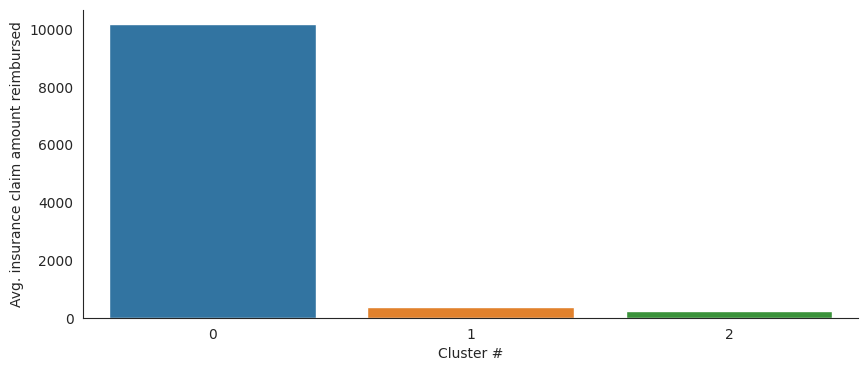

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.set_style("white")
plt.figure(figsize=(10,4)) 

aryClusters = train_final['cluster_pca'].unique()

sns.barplot(x=aryClusters, y='InscClaimAmtReimbursed', data=pdfTrain_avgByCluster)
plt.ylabel('Avg. insurance claim amount reimbursed')
plt.xlabel('Cluster #')
sns.despine()

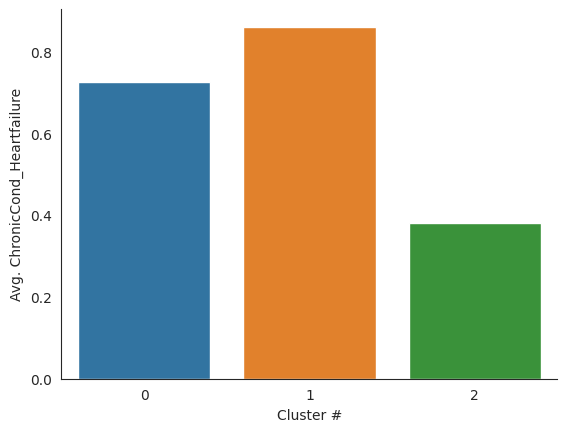

In [131]:
sns.barplot(x=aryClusters, y='ChronicCond_Heartfailure', data=pdfTrain_avgByCluster)
plt.ylabel('Avg. ChronicCond_Heartfailure')
plt.xlabel('Cluster #')
sns.despine()

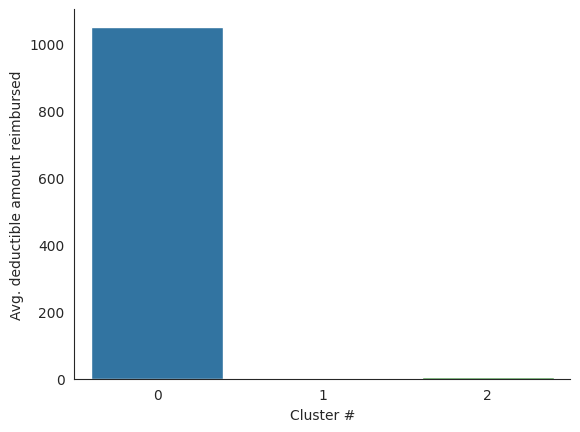

In [132]:
sns.barplot(x=aryClusters, y='DeductibleAmtPaid', data=pdfTrain_avgByCluster)
plt.ylabel('Avg. deductible amount reimbursed')
plt.xlabel('Cluster #')
sns.despine()

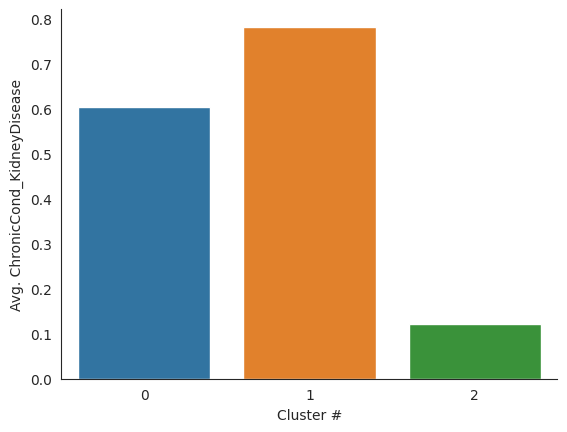

In [133]:
sns.barplot(x=aryClusters, y='ChronicCond_KidneyDisease', data=pdfTrain_avgByCluster)
plt.ylabel('Avg. ChronicCond_KidneyDisease')
plt.xlabel('Cluster #')
sns.despine()

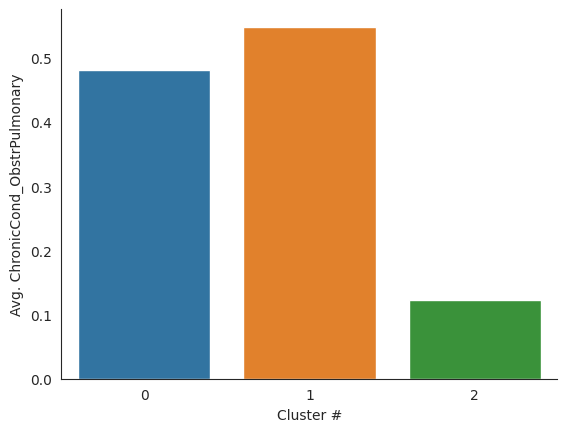

In [134]:
sns.barplot(x=aryClusters, y='ChronicCond_ObstrPulmonary', data=pdfTrain_avgByCluster)
plt.ylabel('Avg. ChronicCond_ObstrPulmonary')
plt.xlabel('Cluster #')
sns.despine()

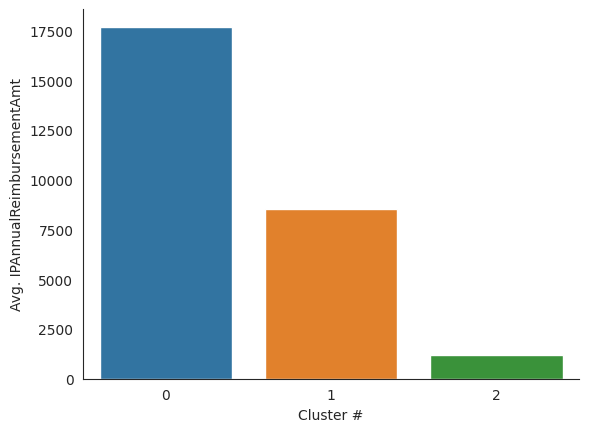

In [135]:
sns.barplot(x=aryClusters, y='IPAnnualReimbursementAmt', data=pdfTrain_avgByCluster)
plt.ylabel('Avg. IPAnnualReimbursementAmt')
plt.xlabel('Cluster #')
sns.despine()

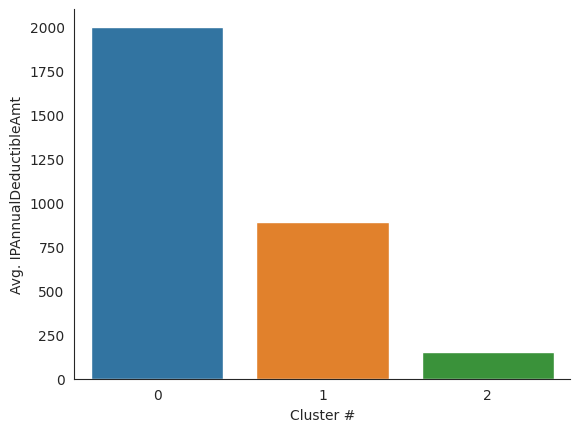

In [137]:
sns.barplot(x=aryClusters, y='IPAnnualDeductibleAmt', data=pdfTrain_avgByCluster)
plt.ylabel('Avg. IPAnnualDeductibleAmt')
plt.xlabel('Cluster #')
sns.despine()
